## ADLUDIO CHALLENGE: TASK 4
1. importing libraries and loading data
2. Exploring the data 
3. Adding column features specified on the doc
4. Using **corr()** method of pandas to see the correlation between continuous variables
5. Plotting pair plot to see the correlation between the columns
6. Considering different Categorical correlation methods to see the possiblities
7. Summary and Description of each pair plot and the correlation between each Columns

### 1. importing Libraries and loading data

In [1]:
# importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from pylab import rcParams

import scipy
from scipy.stats import spearmanr


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

sns.set_style('whitegrid')

In [3]:
#simply importing the data from csv given or
data = pd.read_csv('../data/dataset.csv')

In [4]:
# parsing the json data provided
file = '../data/dataset.json'
with open(file) as json_file:
    json_data = json.load(json_file)

In [5]:
json_data = json_data['game_data']

In [6]:
df_json = pd.DataFrame(json_data, columns=json_data.keys())

In [7]:
# from the data we can see that the data improted from json and csv are similar 
# I am going to use the CSV
df_json.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0,1,1
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568,23607,54873
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0,6,26
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0,0,6
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0,31,85


### 2. Exploring the data

In [8]:

data.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0


In [9]:
data.shape

(3272, 8)

In [10]:
data.dtypes

first_key               object
version                 object
region                  object
season                  object
vertical                object
click-through-event    float64
first_dropped          float64
impression             float64
dtype: object

In [11]:
data.describe()

,click-through-event,first_dropped,impression
count,3.272000e+03,3.272000e+03,3.272000e+03
mean,3.195643e+03,1.234776e+04,9.026797e+04
std,2.827049e+04,8.562637e+04,6.505723e+05
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,7.000000e+00
50%,1.000000e+00,2.200000e+01,8.700000e+01
75%,3.822500e+02,3.060250e+03,2.310575e+04
max,1.240031e+06,2.318560e+06,1.419784e+07


In [12]:
data.isnull().sum()

first_key              0
version                0
region                 0
season                 0
vertical               0
click-through-event    0
first_dropped          0
impression             0
dtype: int64

### Description of columns From the given document
Data Columns

The data you are asked to analyse may contain a subset of the following columns

* Creative - an ad that is shown to a target in a web or mobile app 
* game_key               creative identifier           

#### Creative performance KPIs 
* click_through                                            the number of clicks at post-engagement screen
* engagements (first_dropped)                   the number of engagements
* Impressions                                       	 the total number of exposures at pre-engagement


* engagement_rate = ER = engagements/Impressions
* click_through_rate = CTR = click_throughs/Impressions

Overall size of creative (so we can derive relative size of engagement area in relation to absolute size)

Location and size of engagement trigger zone  - x / y coordinates are relative to the upper left corner of the creative

Location and size of engagement area - x / y coordinates are relative to the upper left corner of the creative. 

Region - geographical area identifier (subset of countries make up a region)
Season - calendar year division identifier 
Vertical - business type identifier (subset of similar businesses make up a vertical)
Target (KPIs) - business objective to maximise 


### 3. Adding engagement rate and click through rate columns

In [13]:
def add_rate_columns(df, numerator, denominotor, col_name):
    df[col_name] = df[numerator] / df[denominotor]
    
    return df

In [14]:
data = add_rate_columns(data, 'first_dropped', 'impression', 'ER')
data = add_rate_columns(data, 'click-through-event', 'impression',  'CTR')

data.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression,ER,CTR
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0,1.000000,0.000000
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0,0.430212,0.028575
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0,0.230769,0.000000
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0,0.000000,0.000000
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0,0.364706,0.000000


### 3. Checking a correlation between numerical columns

In [15]:
data.corr() #correlation between numerical columns

,click-through-event,first_dropped,impression,ER,CTR
click-through-event,1.000000,0.394079,0.669652,-0.038853,0.025571
first_dropped,0.394079,1.000000,0.891356,-0.023964,-0.018397
impression,0.669652,0.891356,1.000000,-0.048194,-0.017969
ER,-0.038853,-0.023964,-0.048194,1.000000,0.051400
CTR,0.025571,-0.018397,-0.017969,0.051400,1.000000


### 4. Checking the correlation between columns using pair plot 

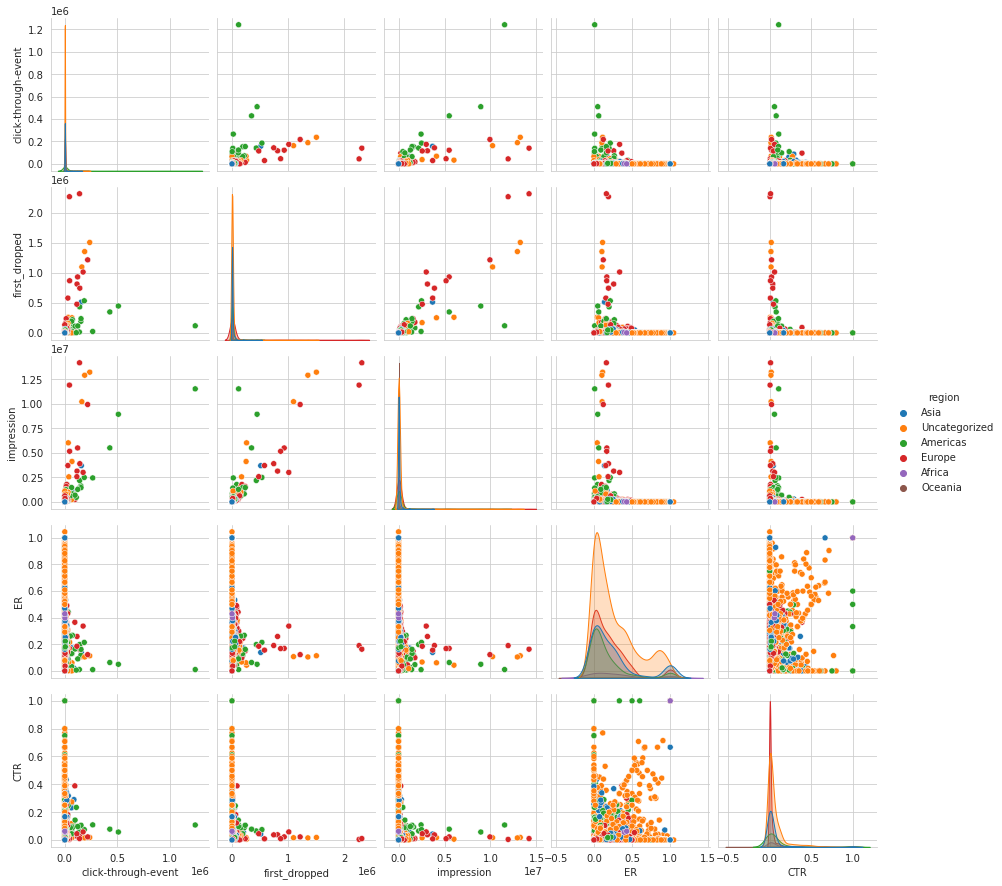

In [16]:
sns.pairplot(data, hue = 'region')

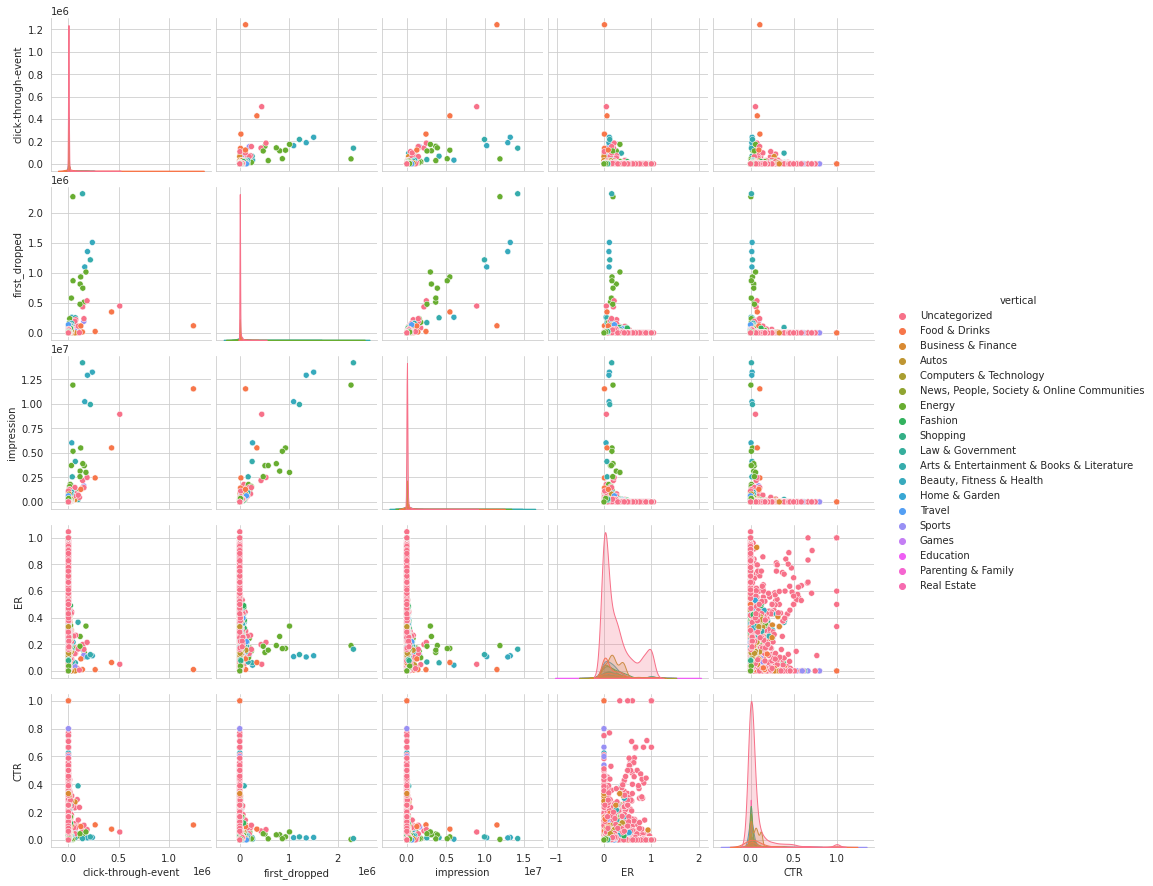

In [17]:
sns.pairplot(data, hue = 'vertical')

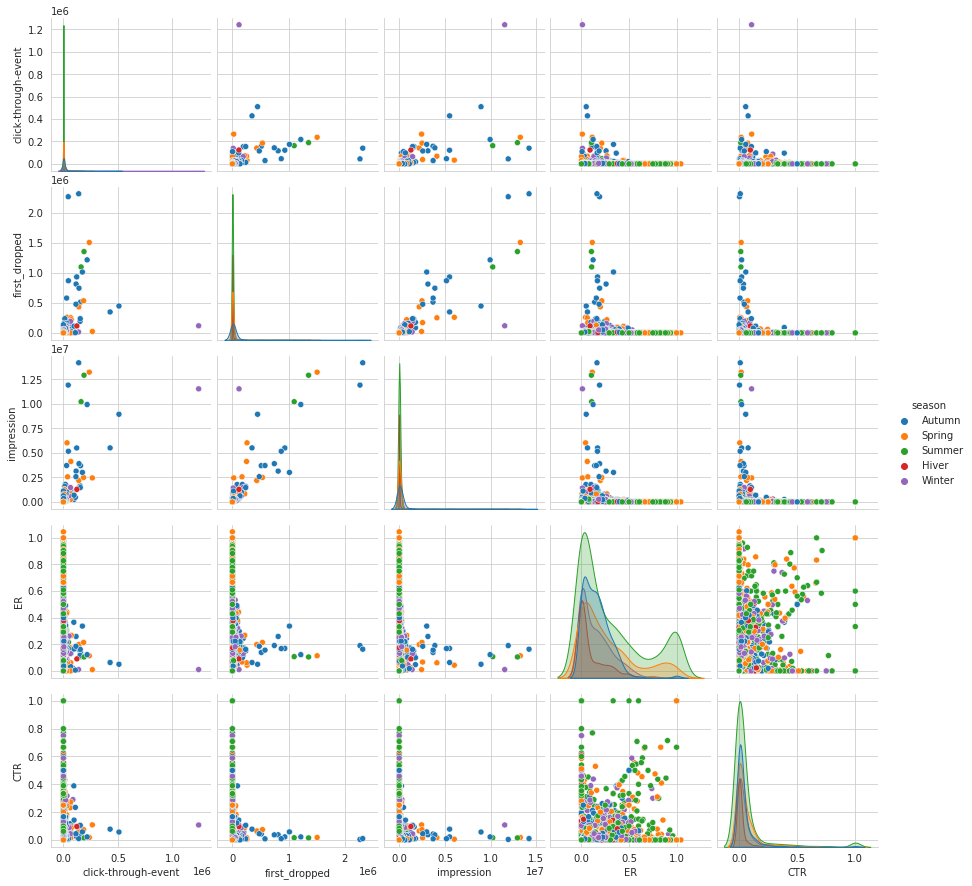

In [18]:
sns.pairplot(data, hue = 'season')

#### Categorical Variables considerations
* first we need to convert the categorical variables to numerical variable and for that We are going to use
1. Label Encoding


In [19]:
# ! conda install scikit-learn

In [20]:
# Label Encoding: I don't want the first key and version sicne they are included as an Identifier
# region, vertical and season are what I want to expermetn with

from sklearn.preprocessing import LabelEncoder



In [21]:
le = LabelEncoder()

In [22]:
data['region'] = le.fit_transform(data['region'])
data['season'] = le.fit_transform(data['season'])
data['vertical'] = le.fit_transform(data['vertical'])

In [24]:
data.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression,ER,CTR
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,2,0,18,0.0,1.0,1.0,1.000000,0.000000
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,5,2,8,1568.0,23607.0,54873.0,0.430212,0.028575
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,5,2,18,0.0,6.0,26.0,0.230769,0.000000
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,5,3,8,0.0,0.0,6.0,0.000000,0.000000
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,5,3,18,0.0,31.0,85.0,0.364706,0.000000


In [25]:
data.corr()

,region,season,vertical,click-through-event,first_dropped,impression,ER,CTR
region,1.000000,0.164563,-0.201783,-0.071532,-0.028059,-0.032883,0.085748,0.020447
season,0.164563,1.000000,-0.039236,-0.041984,-0.107600,-0.084882,0.122696,0.063570
vertical,-0.201783,-0.039236,1.000000,-0.052107,-0.101787,-0.097712,0.103119,0.083029
click-through-event,-0.071532,-0.041984,-0.052107,1.000000,0.394079,0.669652,-0.038853,0.025571
first_dropped,-0.028059,-0.107600,-0.101787,0.394079,1.000000,0.891356,-0.023964,-0.018397
impression,-0.032883,-0.084882,-0.097712,0.669652,0.891356,1.000000,-0.048194,-0.017969
ER,0.085748,0.122696,0.103119,-0.038853,-0.023964,-0.048194,1.000000,0.051400
CTR,0.020447,0.063570,0.083029,0.025571,-0.018397,-0.017969,0.051400,1.000000


In [26]:
df_corr = data[['region','season','vertical','ER','CTR']]

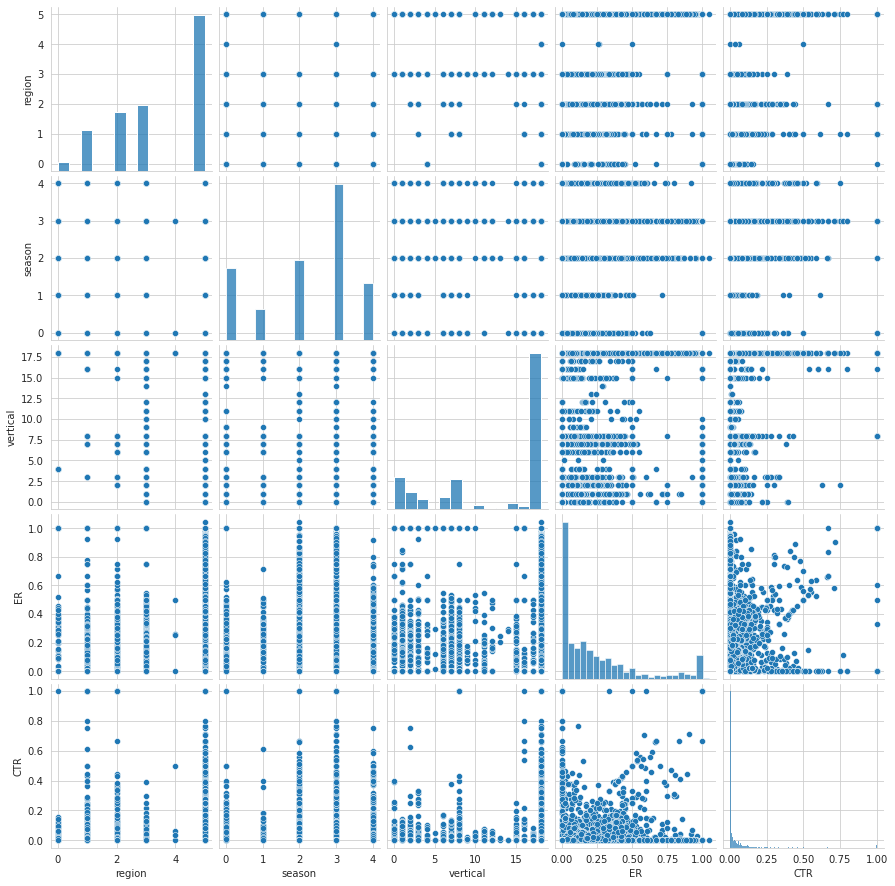

In [29]:
sns.pairplot(df_corr)

In [27]:
df_corr.corr()

,region,season,vertical,ER,CTR
region,1.000000,0.164563,-0.201783,0.085748,0.020447
season,0.164563,1.000000,-0.039236,0.122696,0.063570
vertical,-0.201783,-0.039236,1.000000,0.103119,0.083029
ER,0.085748,0.122696,0.103119,1.000000,0.051400
CTR,0.020447,0.063570,0.083029,0.051400,1.000000
